<a href="https://colab.research.google.com/github/mankind/jupyter-notebooks/blob/master/fun_mooc_mlin_Python_with_scikit_learn_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://lms.fun-mooc.fr/login

# https://inria.github.io/scikit-learn-mooc/python_scripts/01_tabular_data_exploration.html
# https://github.com/INRIA/scikit-learn-mooc/tree/main/notebooks
# https://github.com/INRIA/scikit-learn-mooc/tree/main/datasets


import pandas as pd

# The goal with this data is to predict whether a person earns over 50K a year from heterogeneous data such as age, employment, education, family information, etc.
# We will use data from the 1994 US census 
# url = "https://www.openml.org/api/v1/json/data/1590"
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv"
adult_census = pd.read_csv(url)
print(adult_census.shape)
print("  ")


(48842, 14)
  


In [ ]:
# Each row represents a "sample". In the field of machine learning or descriptive statistics,
 # commonly used equivalent terms are "record", "instance", or "observation".

# Each column represents a type of information that has been collected and is called a "feature".
 # In the field of machine learning and descriptive statistics, commonly used equivalent terms are "variable", "attribute", or "covariate".

print(adult_census.head())

   age   workclass      education  education-num       marital-status  \
0   25     Private           11th              7        Never-married   
1   38     Private        HS-grad              9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm             12   Married-civ-spouse   
3   44     Private   Some-college             10   Married-civ-spouse   
4   18           ?   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United-States   <=50K  
1             0              5

In [ ]:
# The column named class is our target variable (i.e., the variable which we want to predict). 
# The two possible classes are <=50K (low-revenue) and >50K (high-revenue). The resulting prediction problem
# is therefore a binary classification problem, while we will use the other columns as input variables for our model.

target_column = "class"
adult_census[target_column].value_counts()

# note that the counts show that
# Classes are slightly imbalanced, meaning there are more samples of one or more classes compared to others.
 # Class imbalance happens often in practice and may need special techniques when building a predictive model.
 

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [ ]:
# The dataset contains both numerical and categorical data. Numerical values take continuous values, for example "age". 
# Categorical values can have a finite number of values, for example "native-country".

numerical_columns = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]


all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]


In [ ]:
# We can check the number of samples and the number of columns available in the dataset:

print(f"the dataset contains {adult_census.shape[0]} samples and {adult_census.shape[1]} columns or features")

the dataset contains 48842 samples and 14 columns or features


In [ ]:
# We can compute the number of features by counting the number of columns and subtract 1, since one of the columns is the target.
print(f"The dataset contains {adult_census.shape[1] - 1} features")

The dataset contains 13 features


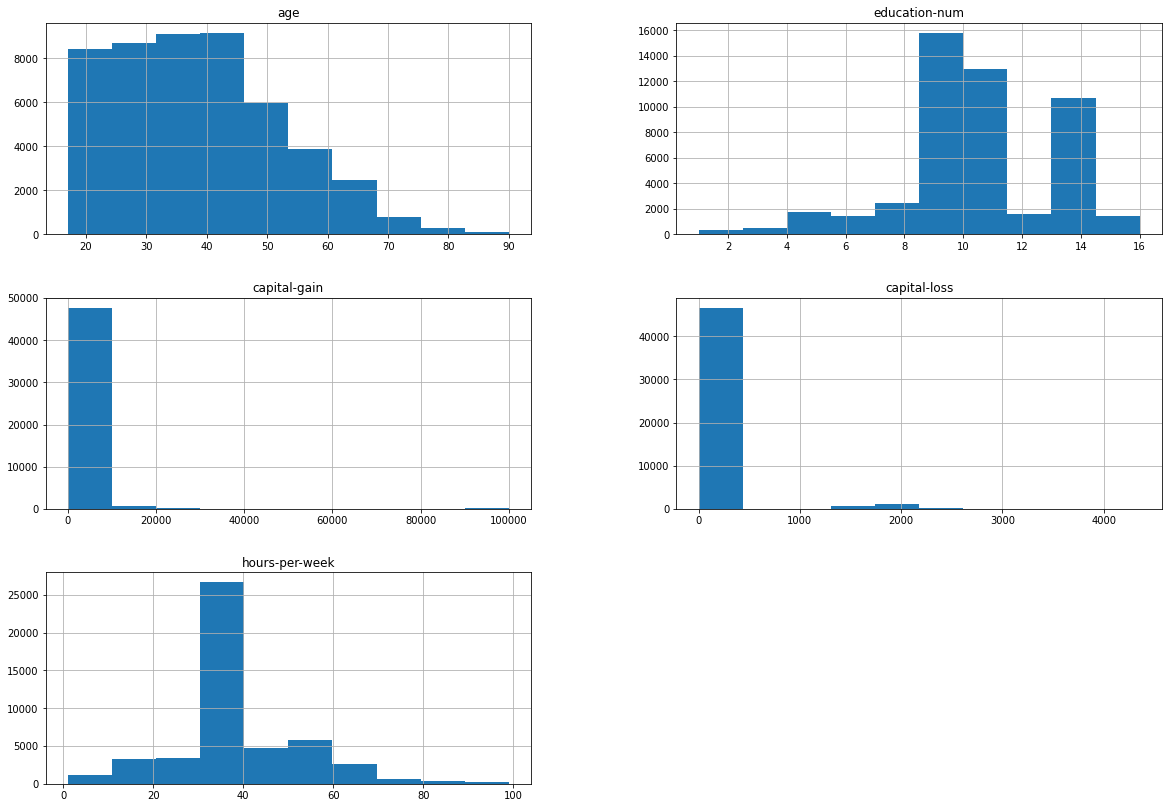

In [ ]:
# Visual inspection of the data

_ = adult_census.hist(figsize=(20, 14))

In [ ]:
#For categorical variables, we can look at the distribution of values:


print(""" ### Note that there is an important imbalance on the data collection concerning the number of \n
        male/female samples. Be aware that any kind of data imbalance will impact the generalizability of a model trained on it. \n
        Moreover, it can lead to fairness problems if used naively when deploying a real life setting.""")
print(" ")
print("""
##### Ideas which will be discussed more in detail later: \n

if your target variable is imbalanced (e.g., you have more samples from one target category than another), you may need special techniques for training and evaluating your machine learning model; \n
having redundant (or highly correlated) columns can be a problem for some machine learning algorithms; \n
contrary to decision tree, linear models can only capture linear interactions, so be aware of non-linear relationships in your data. \n
""")
print("  ")
print(adult_census['sex'].value_counts())

print("  ")
print(" 'education-num' distribution has two clear peaks around 10 and 13. It would be reasonable to expect that 'education-num' is the number of years of education.")
print("####")
print(adult_census["education"].value_counts())

print("  ")
print("### Let's look at the relationship between 'education' and 'education-num'. ###")
k = """
    This shows that "education" and "education-num" give you the same information. For example, "education-num"=2 is equivalent to "education"="1st-4th".
     In practice that means we can remove "education-num" without losing information. Note that having redundant (or highly correlated) columns 
     can be a problem for machine learning algorithms.
   """
print(k)
print("#### In the upcoming notebooks, we will only keep the 'education' variable, excluding the 'education-num' variable since the latter is redundant with the former. ")

pd.crosstab(index=adult_census["education"], columns=adult_census["education-num"])


 ### Note that there is an important imbalance on the data collection concerning the number of 

        male/female samples. Be aware that any kind of data imbalance will impact the generalizability of a model trained on it. 

        Moreover, it can lead to fairness problems if used naively when deploying a real life setting.
 

##### Ideas which will be discussed more in detail later: 


if your target variable is imbalanced (e.g., you have more samples from one target category than another), you may need special techniques for training and evaluating your machine learning model; 

having redundant (or highly correlated) columns can be a problem for some machine learning algorithms; 

contrary to decision tree, linear models can only capture linear interactions, so be aware of non-linear relationships in your data. 


  
 Male      32650
 Female    16192
Name: sex, dtype: int64
  
 'education-num' distribution has two clear peaks around 10 and 13. It would be reasonable to expect t

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0



Another way to inspect the data is to do a pairplot and show how each variable 
differs according to our target, i.e. "class". Plots along the diagonal show the distribution of
 individual variables for each "class". The plots on the off-diagonal can reveal interesting interactions between variables.

 ### We will plot a subset of the data to keep the plot readable and make the plotting faster


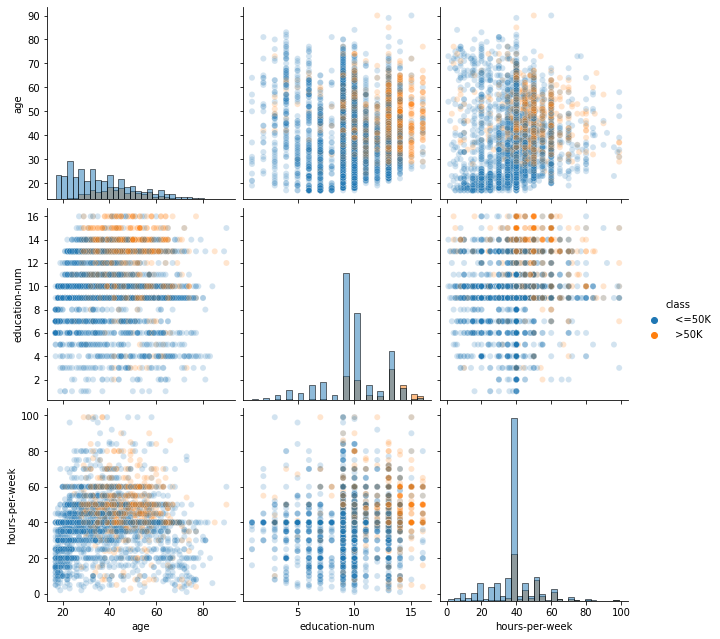

In [ ]:
print ( """
Another way to inspect the data is to do a pairplot and show how each variable 
differs according to our target, i.e. "class". Plots along the diagonal show the distribution of
 individual variables for each "class". The plots on the off-diagonal can reveal interesting interactions between variables.
""")

import seaborn as sns

print(" ### We will plot a subset of the data to keep the plot readable and make the plotting faster")

n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]

_ = sns.pairplot(
      data=adult_census[:n_samples_to_plot],
      vars=columns,
      hue=target_column,
      plot_kws={"alpha": 0.2},
     height=3,
     diag_kind="hist",
     diag_kws={"bins": 30},
   )



       By looking at the previous plots, we could create some hand-written rules that predict whether someone has a high- or low-income.
        For instance, we could focus on the combination of the "hours-per-week" and "age" features.
      
  

       The data points (circles) show the distribution of "hours-per-week" and "age" in the dataset. Blue points mean low-income and 
       orange points mean high-income. This part of the plot is the same as the bottom-left plot in the pairplot above.
      


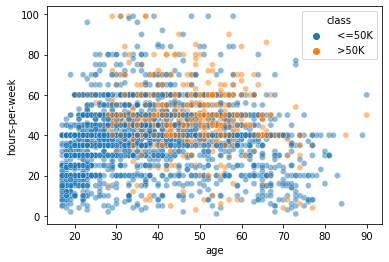

In [ ]:

#  Creating decision rules by hand

print ("""
       By looking at the previous plots, we could create some hand-written rules that predict whether someone has a high- or low-income.
        For instance, we could focus on the combination of the "hours-per-week" and "age" features.
      """)

_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

print("  ")
print("""
       The data points (circles) show the distribution of "hours-per-week" and "age" in the dataset. Blue points mean low-income and 
       orange points mean high-income. This part of the plot is the same as the bottom-left plot in the pairplot above.
      """)


       In this plot, we can try to find regions that mainly contains a single class such that we can easily 
       decide what class one should predict. We could come up with hand-written rules as shown in this plot:
      
### age limit in blackline
  
## hours per week limit in red line
annotation
 
- In the region age < 27 (left region) the prediction is low-income. Indeed, there are many blue points and we cannot see any orange points. 

- In the region age > 27 AND hours-per-week < 40 (bottom-right region), the prediction is low-income. Indeed, there are many blue points and only a few orange points. 

- In the region age > 27 AND hours-per-week > 40 (top-right region), we see a mix of blue points and orange points. It seems complicated to choose which class we should predict in this region. 

It is interesting to note that some machine learning models will work similarly to what we did: they are known as decision tree models. The two thresholds that we chose (27 years and 40 ho

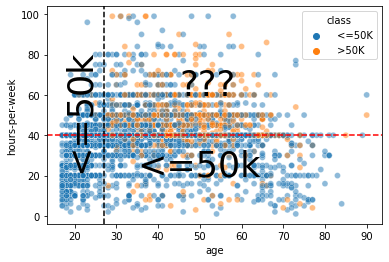

In [ ]:
print("""
       In this plot, we can try to find regions that mainly contains a single class such that we can easily 
       decide what class one should predict. We could come up with hand-written rules as shown in this plot:
      """)

import matplotlib.pyplot as plt

ax = sns.scatterplot(
        x="age",
        y="hours-per-week",
        data=adult_census[:n_samples_to_plot],
        hue=target_column,
        alpha=0.5,
     )


print("### age limit in blackline")
age_limit = 27
plt.axvline(x=age_limit, ymin=0,  ymax=1, color="black", linestyle="--")

print("  ")
print("## hours per week limit in red line")
hours_per_week = 40
plt.axhline(y=40, xmin=0, xmax=1, color="red", linestyle="--")

print("annotation")
plt.annotate("<=50k", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50k", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

print(""" 
- In the region age < 27 (left region) the prediction is low-income. Indeed, there are many blue points and we cannot see any orange points. \n
- In the region age > 27 AND hours-per-week < 40 (bottom-right region), the prediction is low-income. Indeed, there are many blue points and only a few orange points. \n
- In the region age > 27 AND hours-per-week > 40 (top-right region), we see a mix of blue points and orange points. It seems complicated to choose which class we should predict in this region. \n
It is interesting to note that some machine learning models will work similarly to what we did: they are known as decision tree models. The two thresholds that we chose (27 years and 40 hours) \n
   are somewhat arbitrary, i.e. we chose them by only looking at the pairplot. In contrast, a decision tree will choose the "best" splits based on data without human intervention or inspection. \n
   Decision trees will be covered more in detail in a future module. \n

Note that machine learning is really interesting when creating rules by hand is not straightforward, for example because we are in high dimension (many features) or \n
  because there are no simple and obvious rules that separate the two classes as in the top-right region of the previous plot.

     """)

print("  ")
print("### Note Recap ####")
print("""
     We made important observations (which will be discussed later in more detail):

 -  if your target variable is imbalanced (e.g., you have more samples from one target category than another), you may need special techniques for training and evaluating your machine learning model;
-  having redundant (or highly correlated) columns can be a problem for some machine learning algorithms;
-  contrary to decision tree, linear models can only capture linear interactions, so be aware of non-linear relationships in your data.
""")

In [ ]:
# Fitting a scikit-learn model on numerical data
#
#  First model with scikit-learn

# In particular we will highlight:

# * the scikit-learn API: `.fit(X, y)`/`.predict(X)`/`.score(X, y)`;
# * how to evaluate the generalization performance of a model with a train-test split.

## Loading the dataset with Pandas

